# APIs

An Application Programming Interface, or API, is a structured way to retrieve data from a website. Using an API is safer and easier than something like webscraping, since what you get back is already in a usable format. Many organizations use APIs like:

For this project we will be using
Metro Nashville Police Department reported incidents data available at https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs. 

We will analyze the data reagrding **aggravated burglary incidents ()** during the nine month period from **January 1, 2022 through September 30, 2022**

We will be Using the **2020 American Community Survey API**, obtain, for each census tract, **the population (B01001_001E in the detailed tables) and the median income (S1901_C01_012E in the subject tables)**. Hint: Tennessee's FIPS code is 47 and Davidson County's FIPS code is 37.



# PART1

In [1]:
import requests
import matplotlib.pyplot as plt
import json
import pandas as pd

We will be using the `requests` package to make a `GET` request to an API. Similar to webscraping, APIs require an endpoint to tell python where to send the request.

When using an API, the first thing we need to know is the expected URL structure. In this case, it is 
https://data.nashville.gov/resource/2u6v-ujjs.json **We should not use the json as it will give us the first 2000 or so we need to get specific info from 01/01/2022 to 09/030/2022 and only the bulgary information and analyse it with repsect to the population density, income status and if it happens in a particular IPcode over the other**

In [2]:
endpoint = 'https://data.nashville.gov/resource/2u6v-ujjs.json'

response = requests.get(endpoint)
response
res = response.json() 
res
#response.text #this is not needed as the website sends a json object rather than the url object
res #it is a list of dictionary

#However, it will be easier to work with as a json. We can use the json method to convert the results to a dictionary.
#res.keys() #so this will not work

#as this is a list of dictionaries it can be directly converted to data frame using the pd.DataFrame code.
df = pd.DataFrame(res)
df.head(2)

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,:@computed_region_wvby_4s8j,:@computed_region_3aw5_2wv7,:@computed_region_p6sk_2acq,:@computed_region_gxvr_9jxz
0,20220641257_11,20220641257,W,WITNESS,U,UNFOUNDED,Closed,2022-10-14T16:00:00.000,2022-10-14T16:01:00.000,4343 4343,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.612, 36....",1,2,27,44
1,20220641203_11,20220641203,W,WITNESS,U,UNFOUNDED,Closed,2022-10-14T15:31:00.000,2022-10-14T15:31:00.000,5800 5800,...,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.588, 36....",1,2,26,44


## **Part1: Finding the aggravated burglary in Davidson county for the time period 01/01/2022 - 09/30/2022***
    **we will create the response object using the url and the parameters. this website does not need an API key**

In [3]:
endpoint1 = 'https://data.nashville.gov/resource/2u6v-ujjs.json'

params = {
    
    'offense_description' : 'BURGLARY- AGGRAVATED',
    '$where' : "incident_occurred between '2022-01-01T12:00:00' and '2022-09-30T00:00:00'",
    #'zip_code' : '37207' #we can add any parameter here
}

response1 = requests.get(endpoint1, params = params)

response1

<Response [200]>

#### Converting the resonse object into a json object

In [4]:
res1 = response1.json()
#res1

#### As this json is a list of dictionaries we are going to onvert it in df using the pd.DataFrame

In [5]:
agg_burg = pd.DataFrame(res1)
agg_burg.head(3)
agg_burg.shape

#We only have 1000 rows we need to increase this becuase this is restricted by the API and 
##there is a parameter that can be set to go upto 2000

(1000, 31)

In [6]:
agg_burg.columns
#agg_burg["offense_description"].value_counts()

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'location_code', 'location_description',
       'offense_number', 'offense_nibrs', 'offense_description',
       'weapon_primary', 'weapon_description', 'victim_number',
       'domestic_related', 'victim_type', 'victim_description',
       'victim_gender', 'victim_race', 'victim_ethnicity',
       'victim_county_resident', 'mapped_location', 'rpa', 'zone', 'zip_code'],
      dtype='object')

In [7]:
agg_burg["offense_description"].value_counts() #looking for the description it should only be BURGLARY- AGGRAVATED



BURGLARY- AGGRAVATED    1000
Name: offense_description, dtype: int64

In [8]:
agg_burg.offense_description.unique

<bound method Series.unique of 0      BURGLARY- AGGRAVATED
1      BURGLARY- AGGRAVATED
2      BURGLARY- AGGRAVATED
3      BURGLARY- AGGRAVATED
4      BURGLARY- AGGRAVATED
               ...         
995    BURGLARY- AGGRAVATED
996    BURGLARY- AGGRAVATED
997    BURGLARY- AGGRAVATED
998    BURGLARY- AGGRAVATED
999    BURGLARY- AGGRAVATED
Name: offense_description, Length: 1000, dtype: object>

# Pulling out the TN and Davivdsson county data for population and income

## Pulling out the Population using the link

https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=county:037&in=state:47

In [9]:
endpoint_pop = 'https://api.census.gov/data/2020/acs/acs5?get=NAME,B01001_001E&for=tract:*&in=county:037&in=state:47'


response_pop = requests.get(endpoint_pop)
, 
response_pop

<Response [200]>

## Creating the parameter key to read the website

In [10]:
endpoint_pop = 'https://api.census.gov/data/2020/acs/acs5'

#?get=NAME,B01001_001E&for=tract:*&in=county:037&in=state:47'

params1 = {
    'get' : 'NAME,B01001_001E',
    'for' : 'tract',
    'in' : 'county:037 state:47'
}


response_pop = requests.get(endpoint_pop, params = params1)
, 
response_pop

<Response [200]>

In [11]:
response_pop.text
res_pop = response_pop.json()
TNDA_pop = pd.DataFrame(res_pop)
TNDA_pop.head(3)
#TNDA_pop.shape

,0,1,2,3,4
0,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007


In [12]:
# as the header row has the numbers 1, 2,not the names we are going to change it with the first row which is a header title
header = TNDA_pop.iloc[0] #pull the row 1 in a list called header
TNDA_pop = TNDA_pop[1:] #delete the row 0 which is now becoming the header and start the df from row 1 pands count from 0,1
TNDA_pop.columns = header
TNDA_pop.head()

,NAME,B01001_001E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106


In [13]:
#Renaming the column B01001_00IE as population

TNDA_pop = TNDA_pop.rename(columns={'B01001_001E':'Population'})
TNDA_pop.head()


,NAME,Population,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",5707,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",4336,47,037,019106


## Pulling out the TN and Davivdsson county data forincome
https://api.census.gov/data/2020/acs/acs5/subject?get=NAME,S1901_C01_012E&for=tract:*&in=state:47&in=county:037

In [14]:
endpoint_inc = 'https://api.census.gov/data/2020/acs/acs5/subject'

#?get=NAME,S1901_C01_012E&for=tract:*&in=county:037&in=state:47'

params2 = {
    'get' : 'NAME,S1901_C01_012E',
    'for' : 'tract',
    'in' : 'county:037 state:47'
}
response_inc = requests.get(endpoint_inc, params = params2)

response_inc.text

res_inc = response_inc.json()
res_inc
TNDA_inc = pd.DataFrame(res_inc)
TNDA_inc.head()
#TNDA_inc.shape (175, 5)

,0,1,2,3,4
0,NAME,S1901_C01_012E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",44001,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",48485,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",50512,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",48271,47,037,019105


In [15]:
## Naming the columns same as done for the pop because the header row is missing.
header = TNDA_inc.iloc[0] #pull the row 1 in a list called header
TNDA_inc = TNDA_inc[1:] #delete the row 0 which is now becoming the header and start the df from row 1 pands count from 0,1
TNDA_inc.columns = header
TNDA_inc.head()

,NAME,S1901_C01_012E,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",44001,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",48485,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",50512,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",48271,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",65323,47,037,019106


In [16]:
#Renaming the column S1901_C01_012E as population

TNDA_inc = TNDA_inc.rename(columns={'S1901_C01_012E':'MedianIncome'})
TNDA_inc.head()

,NAME,MedianIncome,state,county,tract
1,"Census Tract 190.04, Davidson County, Tennessee",44001,47,037,019004
2,"Census Tract 190.07, Davidson County, Tennessee",48485,47,037,019007
3,"Census Tract 190.08, Davidson County, Tennessee",50512,47,037,019008
4,"Census Tract 191.05, Davidson County, Tennessee",48271,47,037,019105
5,"Census Tract 191.06, Davidson County, Tennessee",65323,47,037,019106


## Merging the POP and INC data

In [17]:
TNDA_pop_inc = pd.merge(TNDA_pop, TNDA_inc, on=['NAME', 'state', 'county', 'tract'])
TNDA_pop_inc.shape #(174, 6)
TNDA_pop_inc.head(3)

,NAME,Population,state,county,tract,MedianIncome
0,"Census Tract 190.04, Davidson County, Tennessee",4470,47,037,019004,44001
1,"Census Tract 190.07, Davidson County, Tennessee",2904,47,037,019007,48485
2,"Census Tract 190.08, Davidson County, Tennessee",6005,47,037,019008,50512


# PART 2

**Note: Make sure notebook is launched from the conda prompt in the geospatial environment after activating the it using 'conda activate geospatial_ds6' and then 'jupyter notebook'**

**Part 2 - Spatial Joining and Data Merging**
Download the 2020 census tract shapefiles for Tennessee from https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2020.html. (The FIPS code for Tennessee is 47). Perform a spatial join to determine the census tract in which each burglary incident occurred.

Aggregate the data by census tract. Warning: each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents. Which census tract had the highest number of burglaries? Which census tract had the highest number of burglaries per 1000 residents? Note: Make sure that you keep all census tracts, not just those that have had a burglary.

Merge in the census data that you gathered in question 2. Remove any rows that have zero population or negative median income values.

In [19]:
import geopandas as gpd

In [24]:
TN_shape = gpd.read_file('./TN2020_census_shapefiles/')
TN_shape.head()
#TN_shape.shape #(1701, 13)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,47,175,925200,47175925200,9252,Census Tract 9252,G5020,S,227429512,1667739,+35.7438100,-085.4940227,"POLYGON ((-85.61516 35.76106, -85.61509 35.761..."
1,47,175,925000,47175925000,9250,Census Tract 9250,G5020,S,480712883,1225717,+35.6695378,-085.4220628,"POLYGON ((-85.60513 35.70854, -85.60511 35.708..."
2,47,003,950201,47003950201,9502.01,Census Tract 9502.01,G5020,S,121774227,0,+35.6517480,-086.5575518,"POLYGON ((-86.64406 35.64029, -86.64375 35.642..."
3,47,003,950202,47003950202,9502.02,Census Tract 9502.02,G5020,S,110617191,700793,+35.5845755,-086.5790796,"POLYGON ((-86.66377 35.58189, -86.66367 35.582..."
4,47,093,003300,47093003300,33,Census Tract 33,G5020,S,5860088,229299,+36.0020586,-083.8371218,"POLYGON ((-83.86208 35.99255, -83.86207 35.992..."


# Step  to prepare the Burgg data so that it ca be mapped
1. create the geometry column  using the longitiute annd latitude column
2. use the geometry column and TN_shape file as crs to convert the agg_burg to a geodata frame so that it can be merged
3. Merging the TN_burgg to TN shape file 


In [30]:
agg_burg.head
agg_burg.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'location_code', 'location_description',
       'offense_number', 'offense_nibrs', 'offense_description',
       'weapon_primary', 'weapon_description', 'victim_number',
       'domestic_related', 'victim_type', 'victim_description',
       'victim_gender', 'victim_race', 'victim_ethnicity',
       'victim_county_resident', 'mapped_location', 'rpa', 'zone', 'zip_code'],
      dtype='object')

In [33]:
agg_burg['geometry'] = gpd.points_from_xy(agg_burg['longitude'], agg_burg['latitude'])
agg_burg.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,victim_description,victim_gender,victim_race,victim_ethnicity,victim_county_resident,mapped_location,rpa,zone,zip_code,geometry
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,INDIVIDUAL (18 AND OVER),U,W,Non-Hispanic,NON RESIDENT,"{'type': 'Point', 'coordinates': [-86.8, 36.17]}",NaN,NaN,NaN,POINT (-86.80000 36.17000)
1,20220126184_31,20220126184,D,DISPATCHED,O,OPEN,Open,2022-03-18T02:30:00.000,2022-03-18T06:51:00.000,BENTON AVE,...,INDIVIDUAL (18 AND OVER),M,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8029,817,NaN,POINT (-86.77000 36.13000)
2,20220027854_12,20220027854,D,DISPATCHED,O,OPEN,Open,2022-01-18T07:45:00.000,2022-01-19T23:48:00.000,CANE RIDGE RD,...,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.66, 36.04]}",NaN,NaN,NaN,POINT (-86.66000 36.04000)
3,20220032825_11,20220032825,D,DISPATCHED,O,OPEN,Open,2022-01-23T00:40:00.000,2022-01-24T06:57:00.000,BROOKWOOD TER,...,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,"{'type': 'Point', 'coordinates': [-86.86, 36.13]}",5019,121,NaN,POINT (-86.86000 36.13000)
4,20220023736_11,20220023736,D,DISPATCHED,O,OPEN,Open,2022-01-15T10:00:00.000,2022-01-17T11:25:00.000,WEDGEWOOD AVE,...,BUSINESS,NaN,NaN,NaN,NaN,"{'type': 'Point', 'coordinates': [-86.77, 36.13]}",8025,817,NaN,POINT (-86.77000 36.13000)


# convert it to Geo Data for map drawing
The GeoDataFrame() constructor needs 3 parameters:
a DataFrame
a coordinate reference system
a geometry

In [34]:
TN_BURG_GEO = gpd.GeoDataFrame(agg_burg, 
                           crs = TN_shape.crs, 
                           geometry = agg_burg['geometry'])

In [36]:
type(TN_BURG_GEO)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

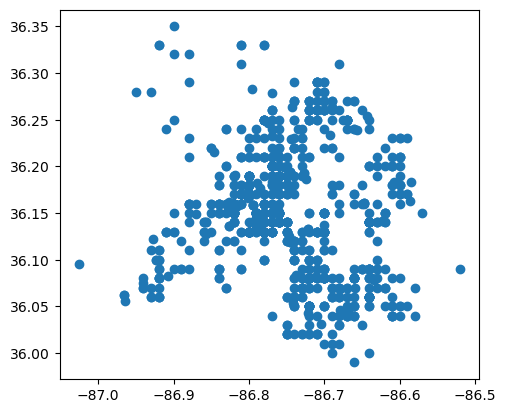

In [37]:
TN_BURG_GEO.plot()

# Merging the agg_burgg data to the TN shape data after conversion to the geo dataframe

In [41]:
BURG_TNDA = gpd.sjoin(TN_BURG_GEO, TN_shape, predicate = 'within')
BURG_TNDA.shape

(998, 45)

In [43]:
BURG_TNDA.head()
BURG_TNDA.columns

Index(['primary_key', 'incident_number', 'report_type',
       'report_type_description', 'incident_status_code',
       'incident_status_description', 'investigation_status',
       'incident_occurred', 'incident_reported', 'incident_location',
       'latitude', 'longitude', 'location_code', 'location_description',
       'offense_number', 'offense_nibrs', 'offense_description',
       'weapon_primary', 'weapon_description', 'victim_number',
       'domestic_related', 'victim_type', 'victim_description',
       'victim_gender', 'victim_race', 'victim_ethnicity',
       'victim_county_resident', 'mapped_location', 'rpa', 'zone', 'zip_code',
       'geometry', 'index_right', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID',
       'NAME', 'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON'],
      dtype='object')

In [44]:
BURG_TNDA.head()

,primary_key,incident_number,report_type,report_type_description,incident_status_code,incident_status_description,investigation_status,incident_occurred,incident_reported,incident_location,...,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,20220167824_11,20220167824,D,DISPATCHED,O,OPEN,Open,2022-04-07T15:00:00.000,2022-04-08T11:52:00.000,JACKSON ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
136,20220285055_11,20220285055,D,DISPATCHED,O,OPEN,Open,2022-06-04T13:17:00.000,2022-06-09T13:17:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
178,20220059646_11,20220059646,D,DISPATCHED,O,OPEN,Open,2022-02-08T21:00:00.000,2022-02-08T22:49:00.000,14TH AVE N,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
237,20220070314_11,20220070314,D,DISPATCHED,O,OPEN,Open,2022-02-15T05:00:00.000,2022-02-15T11:10:00.000,IRELAND ST,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511
244,20220420505_11,20220420505,S,SUSPECT,O,OPEN,Open,2022-08-24T01:00:00.000,2022-08-24T04:02:00.000,14TH AVE N,...,014200,47037014200,142,Census Tract 142,G5020,S,1080635,0,+36.1669323,-086.8036511


NOTE: Create the aggregate columns. The 'TRACTCE' in the BURG_TNDA is same identifies as the tract column in TN_pop_inc.
    
    ggregate the data by census tract. Warning: each incident can appear multiple times if there are multiple victims, so be sure that you aren't double-counting any incidents. Which census tract had the highest number of burglaries? Which census tract had the highest number of burglaries per 1000 residents? Note: Make sure that you keep all census tracts, not just those that have had a burglary.